<a href="https://colab.research.google.com/github/sapna-90/Project_5_Telcom-data/blob/main/Telecom_P5_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  from sklearn.cluster import KMeans

In [2]:
Dataset_3 = pd.read_csv(r"/content/Project_5 - Data_cleaned.csv")

In [5]:
Dataset_3.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube U

In [6]:
# Define relevant columns
relevant_columns = [
    'IMSI', 'TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type'
]

In [7]:
# Subset the data
subset_data = Dataset_3[relevant_columns]

In [8]:
# Replace missing values
subset_data.fillna({
    'TCP DL Retrans. Vol (Bytes)': subset_data['TCP DL Retrans. Vol (Bytes)'].mean(),
    'Avg RTT DL (ms)': subset_data['Avg RTT DL (ms)'].mean(),
    'Avg RTT UL (ms)': subset_data['Avg RTT UL (ms)'].mean(),
    'Avg Bearer TP DL (kbps)': subset_data['Avg Bearer TP DL (kbps)'].mean(),
    'Avg Bearer TP UL (kbps)': subset_data['Avg Bearer TP UL (kbps)'].mean(),
    'Handset Type': subset_data['Handset Type'].mode()[0]
}, inplace=True)

<ipython-input-8-9a18c5f7aa5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.fillna({


In [9]:
# Aggregating per customer
aggregated_data = subset_data.groupby('IMSI').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'
}).reset_index()

In [10]:
# Rename columns for clarity
aggregated_data.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg TCP Retransmission (Bytes)',
    'Avg RTT DL (ms)': 'Avg RTT DL (ms)',
    'Avg RTT UL (ms)': 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL (kbps)',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL (kbps)',
}, inplace=True)

In [11]:
# Task 3.2 - Compute & list top, bottom, and most frequent values
def get_top_bottom_frequent(series, n=10):
    top_n = series.nlargest(n)
    bottom_n = series.nsmallest(n)
    most_frequent_n = series.value_counts().head(n)
    return top_n, bottom_n, most_frequent_n

In [12]:
# TCP retransmission
tcp_retrans_top, tcp_retrans_bottom, tcp_retrans_frequent = get_top_bottom_frequent(aggregated_data['Avg TCP Retransmission (Bytes)'])

In [13]:
# RTT DL
rtt_dl_top, rtt_dl_bottom, rtt_dl_frequent = get_top_bottom_frequent(aggregated_data['Avg RTT DL (ms)'])

In [14]:
# RTT UL
rtt_ul_top, rtt_ul_bottom, rtt_ul_frequent = get_top_bottom_frequent(aggregated_data['Avg RTT UL (ms)'])

In [15]:
# Throughput DL
throughput_dl_top, throughput_dl_bottom, throughput_dl_frequent = get_top_bottom_frequent(aggregated_data['Avg Throughput DL (kbps)'])

In [16]:
# Throughput UL
throughput_ul_top, throughput_ul_bottom, throughput_ul_frequent = get_top_bottom_frequent(aggregated_data['Avg Throughput UL (kbps)'])

In [17]:
# Print results
print("TCP Retransmission Top 10:")
print(tcp_retrans_top)
print("\nTCP Retransmission Bottom 10:")
print(tcp_retrans_bottom)
print("\nTCP Retransmission Most Frequent 10:")
print(tcp_retrans_frequent)

TCP Retransmission Top 10:
3    2.064185e+07
2    2.062201e+07
1    2.061968e+07
0    2.061141e+07
Name: Avg TCP Retransmission (Bytes), dtype: float64

TCP Retransmission Bottom 10:
0    2.061141e+07
1    2.061968e+07
2    2.062201e+07
3    2.064185e+07
Name: Avg TCP Retransmission (Bytes), dtype: float64

TCP Retransmission Most Frequent 10:
Avg TCP Retransmission (Bytes)
2.061141e+07    1
2.061968e+07    1
2.062201e+07    1
2.064185e+07    1
Name: count, dtype: int64


In [18]:
print("\nRTT DL Top 10:")
print(rtt_dl_top)
print("\nRTT DL Bottom 10:")
print(rtt_dl_bottom)
print("\nRTT DL Most Frequent 10:")
print(rtt_dl_frequent)


RTT DL Top 10:
2    77.996353
1    75.792232
3    75.609943
0    72.047039
Name: Avg RTT DL (ms), dtype: float64

RTT DL Bottom 10:
0    72.047039
3    75.609943
1    75.792232
2    77.996353
Name: Avg RTT DL (ms), dtype: float64

RTT DL Most Frequent 10:
Avg RTT DL (ms)
72.047039    1
75.792232    1
77.996353    1
75.609943    1
Name: count, dtype: int64


In [19]:
print("\nThroughput DL Top 10:")
print(throughput_dl_top)
print("\nThroughput DL Bottom 10:")
print(throughput_dl_bottom)
print("\nThroughput DL Most Frequent 10:")
print(throughput_dl_frequent)


Throughput DL Top 10:
0    45.678263
1    44.556326
2    44.281712
3    37.833211
Name: Avg Throughput DL (kbps), dtype: float64

Throughput DL Bottom 10:
3    37.833211
2    44.281712
1    44.556326
0    45.678263
Name: Avg Throughput DL (kbps), dtype: float64

Throughput DL Most Frequent 10:
Avg Throughput DL (kbps)
45.678263    1
44.556326    1
44.281712    1
37.833211    1
Name: count, dtype: int64


In [20]:
print("\nThroughput UL Top 10:")
print(throughput_ul_top)
print("\nThroughput UL Bottom 10:")
print(throughput_ul_bottom)
print("\nThroughput UL Most Frequent 10:")
print(throughput_ul_frequent)


Throughput UL Top 10:
0    48.900409
2    48.268083
1    48.079559
3    43.484203
Name: Avg Throughput UL (kbps), dtype: float64

Throughput UL Bottom 10:
3    43.484203
1    48.079559
2    48.268083
0    48.900409
Name: Avg Throughput UL (kbps), dtype: float64

Throughput UL Most Frequent 10:
Avg Throughput UL (kbps)
48.900409    1
48.079559    1
48.268083    1
43.484203    1
Name: count, dtype: int64


In [21]:
# Task 3.3 - Distribution Analysis
# Distribution of the average throughput (DL and UL) per handset type
throughput_distribution = aggregated_data.groupby('Handset Type').agg({
    'Avg Throughput DL (kbps)': 'mean',
    'Avg Throughput UL (kbps)': 'mean'
}).reset_index()

In [22]:
# Distribution of the average TCP retransmission per handset type
tcp_retransmission_distribution = aggregated_data.groupby('Handset Type').agg({
    'Avg TCP Retransmission (Bytes)': 'mean'
}).reset_index()

In [23]:
# Print distributions
print("\nAverage Throughput Distribution per Handset Type:")
print(throughput_distribution)


Average Throughput Distribution per Handset Type:
                    Handset Type  Avg Throughput DL (kbps)  \
0        Apple iPhone 6S (A1688)                 45.678263   
1       Samsung Galaxy A8 (2018)                 44.281712   
2  Samsung Galaxy S9 Sm-G960F Ds                 37.833211   
3                      undefined                 44.556326   

   Avg Throughput UL (kbps)  
0                 48.900409  
1                 48.268083  
2                 43.484203  
3                 48.079559  


In [24]:
print("\nAverage TCP Retransmission Distribution per Handset Type:")
print(tcp_retransmission_distribution)


Average TCP Retransmission Distribution per Handset Type:
                    Handset Type  Avg TCP Retransmission (Bytes)
0        Apple iPhone 6S (A1688)                    2.061141e+07
1       Samsung Galaxy A8 (2018)                    2.062201e+07
2  Samsung Galaxy S9 Sm-G960F Ds                    2.064185e+07
3                      undefined                    2.061968e+07


In [25]:
# Task 3.4 - K-means Clustering
# Use only numerical data for clustering
clustering_data = aggregated_data[['Avg TCP Retransmission (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                                   'Avg Throughput DL (kbps)', 'Avg Throughput UL (kbps)']]

In [29]:
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(clustering_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
# Cluster centroids
centroids = kmeans.cluster_centers_

In [31]:
# Print cluster centroids and interpretation
print("\nCluster Centroids:")
print(centroids)


Cluster Centroids:
[[2.06208466e+07 7.68942923e+01 1.26669813e+01 4.44190191e+01
  4.81738213e+01]
 [2.06418479e+07 7.56099433e+01 1.36164601e+01 3.78332109e+01
  4.34842028e+01]
 [2.06114135e+07 7.20470394e+01 1.14520239e+01 4.56782628e+01
  4.89004093e+01]]


In [32]:
# Interpret the clusters
for i in range(3):
    cluster_data = aggregated_data[aggregated_data['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(cluster_data.describe())


Cluster 0 Summary:
               IMSI  Avg TCP Retransmission (Bytes)  Avg RTT DL (ms)  \
count  2.000000e+00                    2.000000e+00         2.000000   
mean   2.082015e+14                    2.062085e+07        76.894292   
std    7.071068e+08                    1.644768e+03         1.558549   
min    2.082010e+14                    2.061968e+07        75.792232   
25%    2.082012e+14                    2.062027e+07        76.343262   
50%    2.082015e+14                    2.062085e+07        76.894292   
75%    2.082018e+14                    2.062143e+07        77.445323   
max    2.082020e+14                    2.062201e+07        77.996353   

       Avg RTT UL (ms)  Avg Throughput DL (kbps)  Avg Throughput UL (kbps)  \
count         2.000000                  2.000000                  2.000000   
mean         12.666981                 44.419019                 48.173821   
std           0.286218                  0.194181                  0.133306   
min          12.464

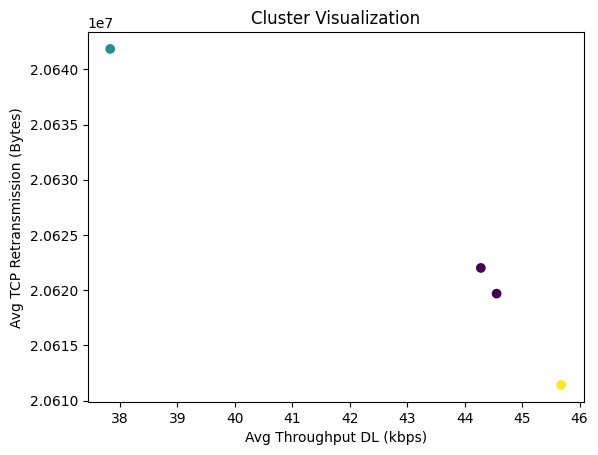

In [39]:
# Plot the clusters
plt.scatter(aggregated_data['Avg Throughput DL (kbps)'], aggregated_data['Avg TCP Retransmission (Bytes)'], c=aggregated_data['Cluster'])
plt.xlabel('Avg Throughput DL (kbps)')
plt.ylabel('Avg TCP Retransmission (Bytes)')
plt.title('Cluster Visualization')
plt.show()